<a href="https://colab.research.google.com/github/MiguelFigueroa02/Challenge_Alura_store/blob/main/Final_AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
nombres = ['tienda', 'tienda2','tienda3','tienda4']
def facturacion(tienda):
  Precios = sum(tienda['Precio'])
  costos = sum(tienda['Costo de envío'])
  total = int(Precios - costos)
  return total

facturaciones = []
facturacion_tienda = [facturacion(tienda), facturacion(tienda2), facturacion(tienda3), facturacion(tienda4)]
facturacion_total = sum(facturacion_tienda)
porc_facturacion = []
for n in facturacion_tienda:
  porciento = (n / facturacion_total)*100
  porc_facturacion.append(round(porciento, 2))

facturaciones = list(zip(nombres, facturacion_tienda, porc_facturacion))

mensaje_facturacion = 'La facturación de las tiendas se distribuyó de la siguiente manera:\n'
for i in range(len(facturaciones)):
  mensaje_facturacion += f'La tienda {facturaciones[i][0]} facturó la cantidad de ${facturaciones[i][1]:,}, lo que representa el {facturaciones[i][2]}% del total\n'
print(mensaje_facturacion)


La facturación de las tiendas se distribuyó de la siguiente manera:
La tienda tienda facturó la cantidad de $1,089,502,500, lo que representa el 26.13% del total
La tienda tienda2 facturó la cantidad de $1,056,858,400, lo que representa el 25.35% del total
La tienda tienda3 facturó la cantidad de $1,039,503,000, lo que representa el 24.93% del total
La tienda tienda4 facturó la cantidad de $983,058,300, lo que representa el 23.58% del total



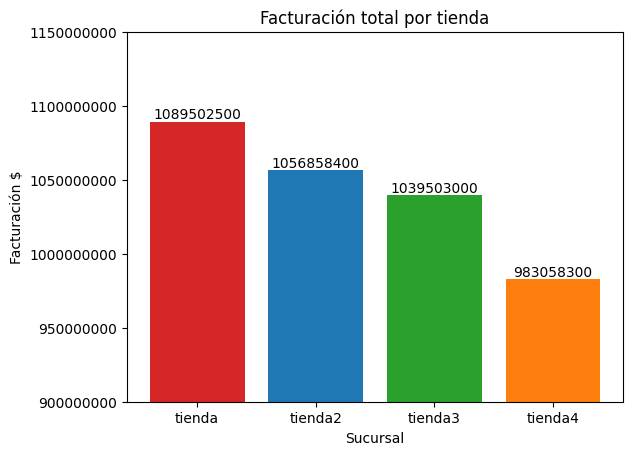

In [ ]:
import matplotlib.pyplot as plt
# from matplotlib.ticker import ScalarFormatter
total = [int(facturacion(tienda)), int(facturacion(tienda2)), int(facturacion(tienda3)), int(facturacion(tienda4))]
fig, ax = plt.subplots()
bar_colors = ['tab:red','tab:blue','tab:green','tab:orange']
barras = ax.bar(nombres, total, width= 0.8, color=bar_colors)
ax.set_ylabel('Facturación $')
ax.set_xlabel('Sucursal')
ax.set_title('Facturación total por tienda')

ax.bar_label(barras, total, label_type='edge')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.set_ylim(900000000, 1150000000)

plt.show()


# 2. Ventas por categoría

In [ ]:
tupla1 = list(zip(tienda['Categoría del Producto'], tienda['Precio']))
# tupla1
categoria = sorted(list(set(list(tienda['Categoría del Producto']))))


def categoria_f(sucursal):
  tupla = list(zip(sucursal['Categoría del Producto'], sucursal['Precio']))
  total_tienda = sum(sucursal['Precio'])
  valores_por_categoria = []
  for n in categoria:
    lista_categoria = []
    for i in range(len(tupla)):
      if tupla[i][0] == n:
        lista_categoria.append(tupla[i][1])
    valores_por_categoria.append(round((sum(lista_categoria)/total_tienda)*100, 2))
  return valores_por_categoria

In [ ]:
resultados = {
    'tienda': categoria_f(tienda),
    'tienda_2': categoria_f(tienda2),
    'tienda_3': categoria_f(tienda3),
    'tienda_4': categoria_f(tienda4)
}

In [ ]:
test_lista = list(resultados.values())
suma_mayores = [(valor[2]+valor[3]+valor[7]) for valor in test_lista]
print(suma_mayores)

[85.22, 83.82, 85.7, 85.25]


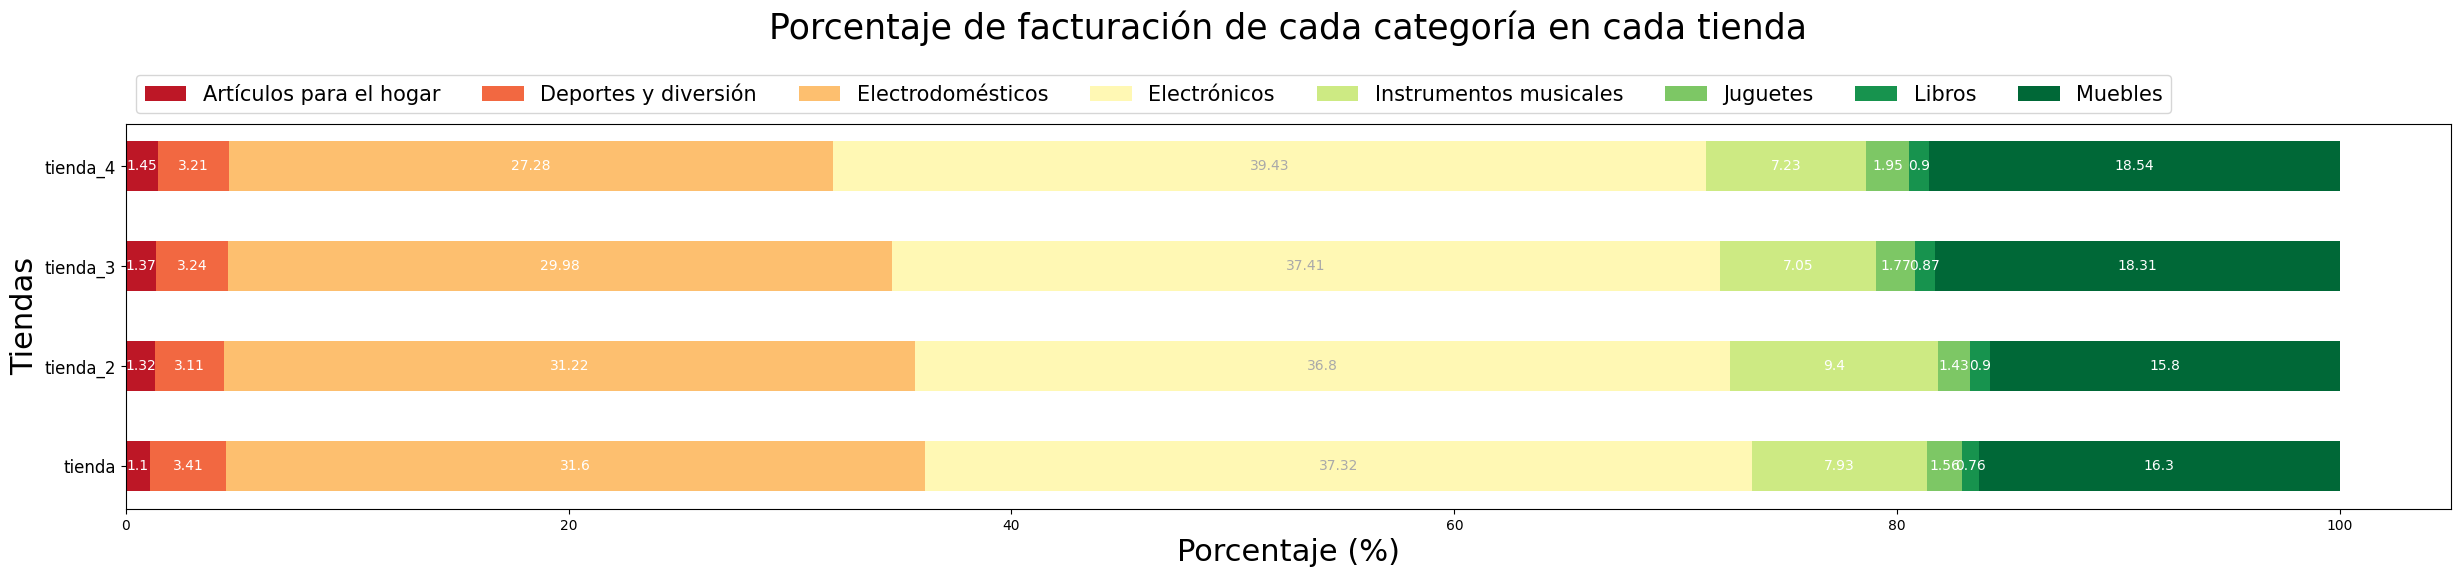

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = list(resultados.keys())
valores_categoria = np.array(list(resultados.values()))
valores_cum = valores_categoria.cumsum(axis=1)
category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.05, 1.05, valores_categoria.shape[1]))

plt.subplots(figsize=(30, 5))

for i, (colname, color) in enumerate(zip(categoria, category_colors)):
  widths = valores_categoria[:, i]
  starts = valores_cum[:, i] - widths
  rects = plt.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

  r, g, b, _ = color
  text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
  plt.bar_label(rects, label_type='center', color=text_color)
  plt.legend(ncols=len(categoria), bbox_to_anchor=(0, 1),
            loc='lower left', fontsize='15')
plt.yticks(fontsize= 12)
plt.title('Porcentaje de facturación de cada categoría en cada tienda', fontsize=25, y=1.2)
plt.xlabel('Porcentaje (%)', fontsize=22)
plt.ylabel('Tiendas', fontsize=22)

plt.show()

In [ ]:
categoria = sorted(list(set(list(tienda['Categoría del Producto']))))


def categoria_contador(sucursal):
  categorias_tienda = (sucursal['Categoría del Producto'])
  cantidades_por_categoria = []
  for n in categoria:
    contador_categoria = 0
    for i in categorias_tienda:
      if i == n:
        contador_categoria += 1
    cantidades_por_categoria.append(contador_categoria)
  return cantidades_por_categoria

In [ ]:
resultados_categorias = {
    'tienda': categoria_contador(tienda),
    'tienda_2': categoria_contador(tienda2),
    'tienda_3': categoria_contador(tienda3),
    'tienda_4': categoria_contador(tienda4)
}
resultados_categorias

{'tienda': [171, 284, 312, 448, 182, 324, 173, 465],
 'tienda_2': [181, 275, 305, 422, 224, 313, 197, 442],
 'tienda_3': [177, 277, 278, 451, 177, 315, 185, 499],
 'tienda_4': [201, 277, 254, 451, 170, 338, 187, 480]}

<ipython-input-21-60550c92d7b2>:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


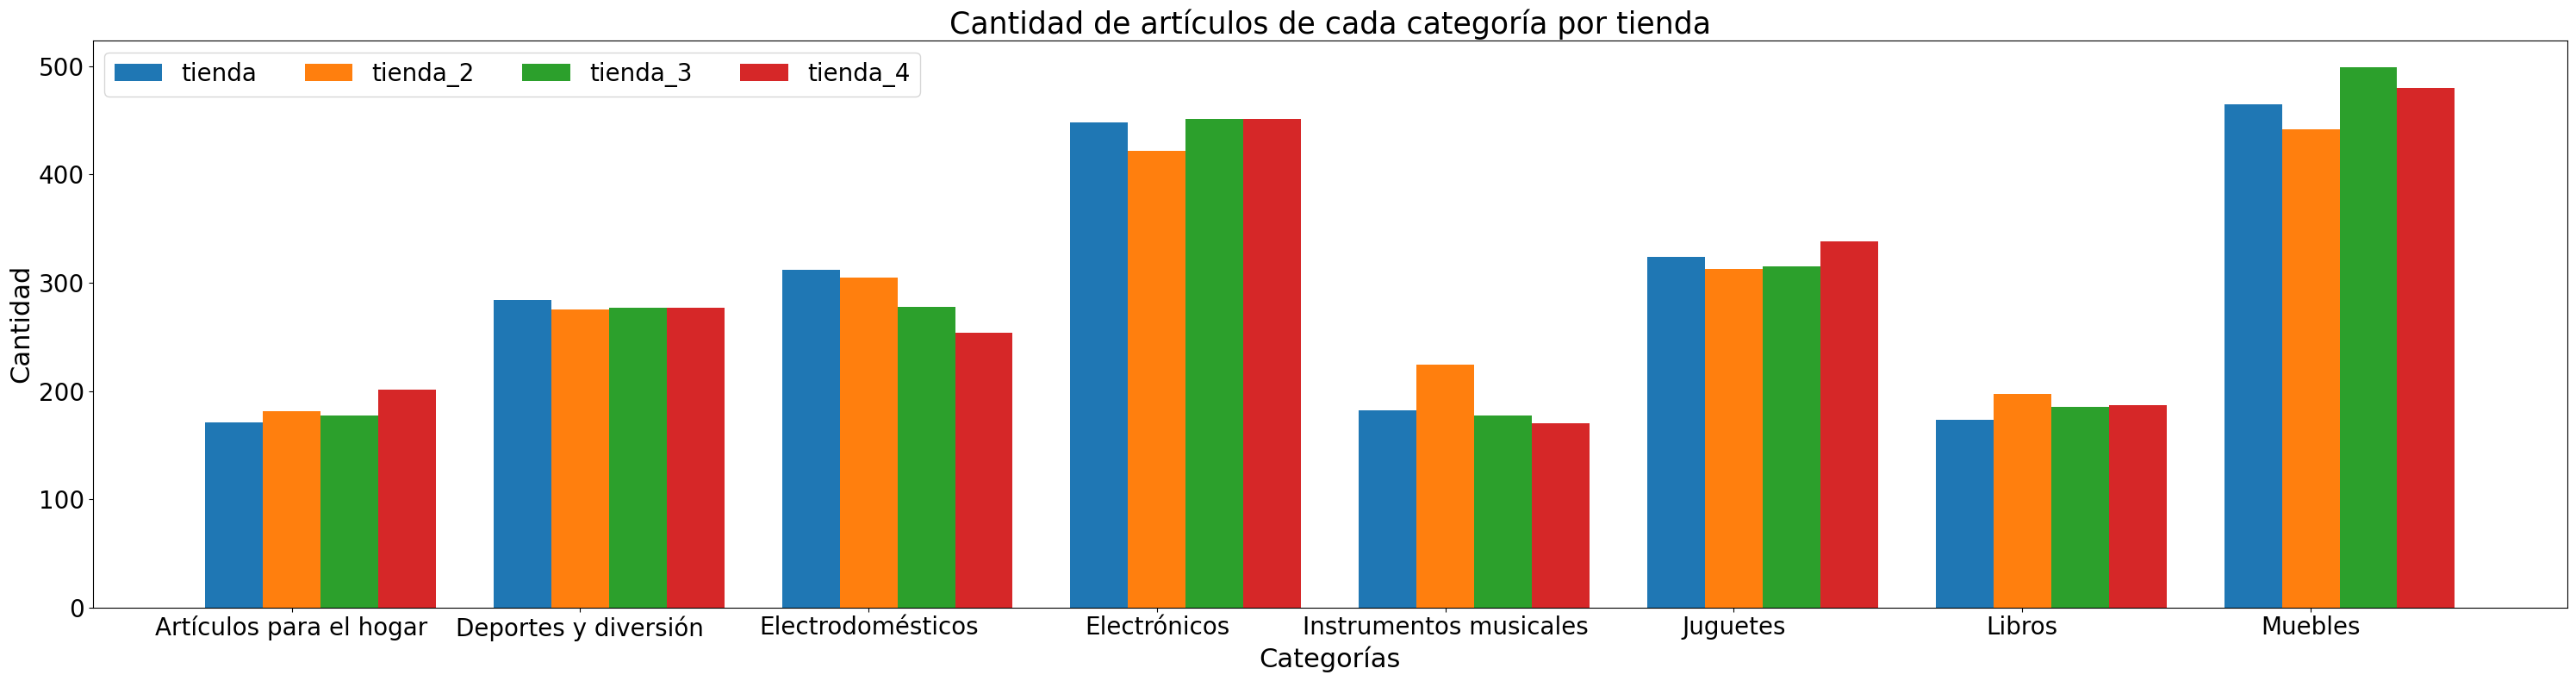

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(categoria))
width = 0.2
multiplier = 0

plt.subplots(layout='constrained', figsize=(30,8))
for atributo, medida in resultados_categorias.items():
  offset = width*multiplier
  barras = plt.bar(x + offset, medida, width, label=atributo)
  multiplier +=1
plt.xticks(x + width, categoria, fontsize= 20)
plt.legend(loc='upper left', ncols= len(categoria),fontsize= 20)
plt.yticks(fontsize= 20)
plt.title('Cantidad de artículos de cada categoría por tienda', fontsize=25)
plt.xlabel('Categorías', fontsize=22)
plt.ylabel('Cantidad', fontsize=22)



plt.tight_layout()
plt.show()

In [ ]:
def categoria3(sucursal):
  tupla = list(zip(sucursal['Categoría del Producto'], sucursal['Precio']))
  categoria = list(set(list(sucursal['Categoría del Producto'])))
  valores_por_categoria = []
  for n in categoria:
    lista_categoria = []
    for i in range(len(tupla)):
      if tupla[i][0] == n:
        lista_categoria.append(tupla[i][1])
    valores_por_categoria.append({n: sum(lista_categoria)})
  categoria_prueba = sorted(valores_por_categoria, key= lambda x : sum(x.values()), reverse=True)

  resultado = []
  for n in categoria:
    contador = 0
    for articulo, precio in tupla:
      if articulo == n:
        contador += 1
    resultado.append({n: contador})
  contador_categoria = sorted(resultado, key= lambda x: sum(x.values()), reverse= True)

  mensaje = f'Las ventas por categoría fueron:\n'
  for n in categoria_prueba:
    for clasificacion, total in n.items():
      mensaje += f'{clasificacion}= ${total:,}\n'
  mensaje = mensaje + f'Y a cantidad de artículos vendidos por categoría fueron:\n'
  for m in contador_categoria:
    for clasificacion_2, contadores in m.items():
      mensaje += f'{clasificacion_2}= {contadores}\n'
  return mensaje

In [ ]:
#Ingresos por categoría tienda uno con función para obtener un orden de acuerdo a artículos vendidos
test_number_1 = categoria3(tienda)
print(test_number_1)

Las ventas por categoría fueron:
Electrónicos= $429,493,500.0
Electrodomésticos= $363,685,200.0
Muebles= $187,633,700.0
Instrumentos musicales= $91,299,000.0
Deportes y diversión= $39,290,000.0
Juguetes= $17,995,700.0
Artículos para el hogar= $12,698,400.0
Libros= $8,784,900.0
Y a cantidad de artículos vendidos por categoría fueron:
Muebles= 465
Electrónicos= 448
Juguetes= 324
Electrodomésticos= 312
Deportes y diversión= 284
Instrumentos musicales= 182
Libros= 173
Artículos para el hogar= 171



In [ ]:
#Ingresos por categoría tienda dos
categorias_tienda2 = categoria3(tienda2)
print(categorias_tienda2)

Las ventas por categoría fueron:
Electrónicos= $410,831,100.0
Electrodomésticos= $348,567,800.0
Muebles= $176,426,300.0
Instrumentos musicales= $104,990,300.0
Deportes y diversión= $34,744,500.0
Juguetes= $15,945,400.0
Artículos para el hogar= $14,746,900.0
Libros= $10,091,200.0
Y a cantidad de artículos vendidos por categoría fueron:
Muebles= 442
Electrónicos= 422
Juguetes= 313
Electrodomésticos= 305
Deportes y diversión= 275
Instrumentos musicales= 224
Libros= 197
Artículos para el hogar= 181



In [ ]:
#Ingresos por categoría tienda tres
categorias_tienda3 = categoria3(tienda3)
print(categorias_tienda3)

Las ventas por categoría fueron:
Electrónicos= $410,775,800.0
Electrodomésticos= $329,237,900.0
Muebles= $201,072,100.0
Instrumentos musicales= $77,380,900.0
Deportes y diversión= $35,593,100.0
Juguetes= $19,401,100.0
Artículos para el hogar= $15,060,000.0
Libros= $9,498,700.0
Y a cantidad de artículos vendidos por categoría fueron:
Muebles= 499
Electrónicos= 451
Juguetes= 315
Electrodomésticos= 278
Deportes y diversión= 277
Libros= 185
Instrumentos musicales= 177
Artículos para el hogar= 177



In [ ]:
#Ingresos por categoría tienda cuatro
categorias_tienda4 = categoria3(tienda4)
print(categorias_tienda4)

Las ventas por categoría fueron:
Electrónicos= $409,476,100.0
Electrodomésticos= $283,260,200.0
Muebles= $192,528,900.0
Instrumentos musicales= $75,102,400.0
Deportes y diversión= $33,350,100.0
Juguetes= $20,262,200.0
Artículos para el hogar= $15,074,500.0
Libros= $9,321,300.0
Y a cantidad de artículos vendidos por categoría fueron:
Muebles= 480
Electrónicos= 451
Juguetes= 338
Deportes y diversión= 277
Electrodomésticos= 254
Artículos para el hogar= 201
Libros= 187
Instrumentos musicales= 170



# 3. Calificación promedio de la tienda


In [ ]:
def promedios(sucursal):
  vendedores = list(set(sucursal['Vendedor']))
  calificaciones_vendedor = []
  for n in vendedores:
    calificaciones_vendedor.append({n: [calificacion_vendedor[1] for calificacion_vendedor in zip(sucursal['Vendedor'], sucursal['Calificación']) if calificacion_vendedor [0] == n]})
  calificaciones_promedio = []
  for n in vendedores:
    calificaciones_promedio.append({n: round(sum(calificaciones_vendedor[i][n]) / len(calificaciones_vendedor[i][n]), 2) for i in range(len(calificaciones_vendedor)) if list(calificaciones_vendedor[i].keys())[0] == n})
  calificaciones_promedio = sorted(calificaciones_promedio, key= lambda x: sum(x.values()), reverse= True)
  promedio_tienda = round((sum(list(sucursal['Calificación'])) / len(list(sucursal['Calificación']))), 2)
  mensaje = f'El promedio general de la tienda es {promedio_tienda}\nY las calificaciones por vendedor fueron: \n'
  lista_vendedores = []
  lista_promedios = []
  for calificacion in calificaciones_promedio:
    for vendedor, promedio in calificacion.items():
      mensaje += f'{vendedor} : {promedio}\n'
      lista_vendedores.append(vendedor)
      lista_promedios.append(promedio)
  return lista_vendedores,lista_promedios,mensaje,promedio_tienda

In [ ]:
#Calificaciones de la primer tienda
vendedores,promedios_1,evaluacion_tienda,valor = promedios(tienda)
print(evaluacion_tienda)

El promedio general de la tienda es 3.98
Y las calificaciones por vendedor fueron: 
Ángel Rodriguez : 4.25
Rafael Acosta : 4.07
Santiago Silva : 4.06
Felipe Santos : 4.04
Beatriz Morales : 4.02
Mariana Herrera : 4.0
Blanca Ramirez : 3.99
Juliana Costa : 3.98
Camila Rivera : 3.95
Pedro Gomez : 3.94
Lucas Olivera : 3.93
Maria Alfonso : 3.88
Juan Fernandez : 3.85
Izabela de León : 3.75



In [ ]:
def grafico(lista_vendedor,lista_calificacion,promedio):
  plt.subplots()
  plt.barh(lista_vendedor, lista_calificacion, align='center')
  plt.ylabel('Vendedores')
  plt.xlabel('Calificación')
  plt.title('Calificaciones por vendedor')
  plt.xlim(3.7, 4.3)

  plt.axvline(promedio, linestyle='--', color='red', label=f'Promedio:{promedio}')
  plt.legend()
  plt.show()

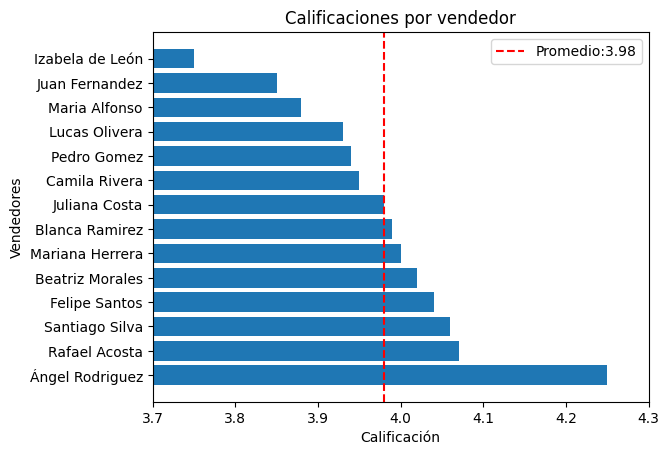

In [ ]:
grafico(vendedores,promedios_1,valor)

In [ ]:
#Calificaciones de la segunda tienda
vendedores_2,promedios_2,evaluacion_tienda_2,valor_2=promedios(tienda2)
vendedores,promedios,evaluacion_tienda,valor
print(evaluacion_tienda_2)

El promedio general de la tienda es 4.04
Y las calificaciones por vendedor fueron: 
Mariana Herrera : 4.19
Pedro Gomez : 4.17
Camila Rivera : 4.14
Felipe Santos : 4.11
Maria Alfonso : 4.08
Ángel Rodriguez : 4.07
Juan Fernandez : 4.06
Rafael Acosta : 4.01
Izabela de León : 4.0
Beatriz Morales : 3.95
Lucas Olivera : 3.95
Santiago Silva : 3.94
Juliana Costa : 3.94
Blanca Ramirez : 3.93



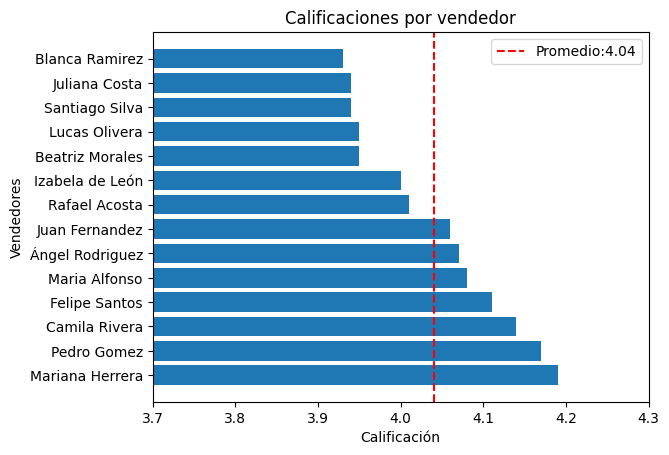

In [ ]:
grafico(vendedores_2,promedios_2,valor_2)

In [ ]:
#Calificaciones de la tercer tienda
vendedores_3,promedios_3,evaluacion_tienda_3,valor_3 = promedios(tienda3)
print(evaluacion_tienda_3)

El promedio general de la tienda es 4.05
Y las calificaciones por vendedor fueron: 
Beatriz Morales : 4.21
Pedro Gomez : 4.19
Juan Fernandez : 4.18
Ángel Rodriguez : 4.18
Rafael Acosta : 4.16
Felipe Santos : 4.14
Camila Rivera : 4.13
Mariana Herrera : 4.06
Lucas Olivera : 4.02
Blanca Ramirez : 3.98
Santiago Silva : 3.96
Maria Alfonso : 3.95
Juliana Costa : 3.81
Izabela de León : 3.73



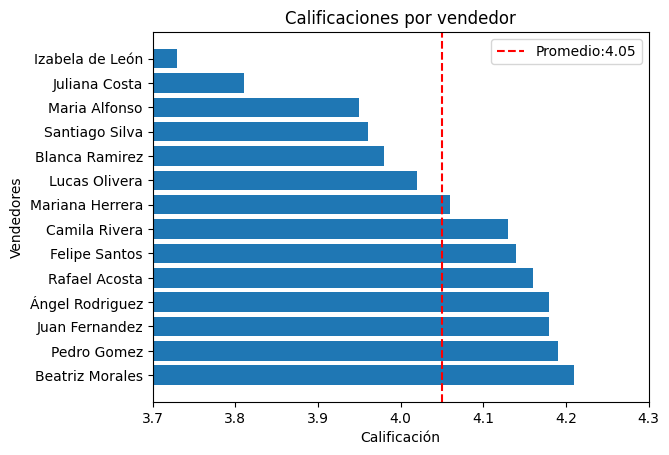

In [ ]:
grafico(vendedores_3,promedios_3,valor_3)

In [ ]:
#Calificaciones de la primer tienda
vendedores_4,promedios_4,evaluacion_tienda_4,valor_4 = promedios(tienda4)
print(evaluacion_tienda_4)

El promedio general de la tienda es 4.0
Y las calificaciones por vendedor fueron: 
Santiago Silva : 4.16
Blanca Ramirez : 4.08
Mariana Herrera : 4.04
Ángel Rodriguez : 4.04
Juan Fernandez : 4.03
Felipe Santos : 4.02
Beatriz Morales : 4.02
Rafael Acosta : 4.0
Juliana Costa : 3.95
Lucas Olivera : 3.95
Izabela de León : 3.94
Camila Rivera : 3.92
Maria Alfonso : 3.91
Pedro Gomez : 3.86



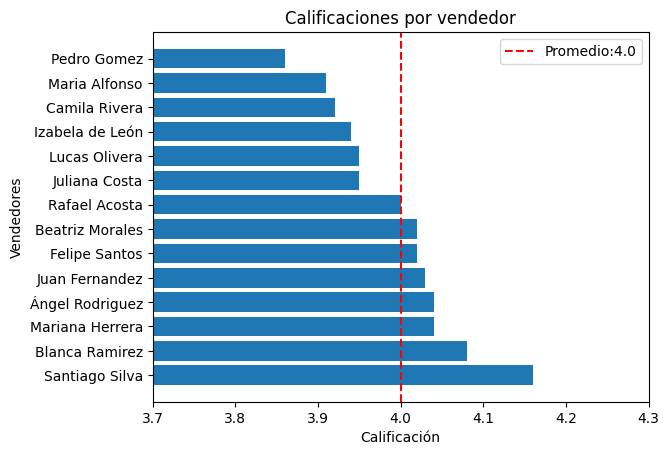

In [ ]:
grafico(vendedores_4,promedios_4,valor_4)

# 4. Productos más y menos vendidos

In [ ]:
def contador2(sucursal):
  productos = list(sucursal['Producto'])
  productos_unicos = list(set(list(zip(sucursal['Producto'],sucursal['Categoría del Producto']))))
  cuenta_total = []
  for producto,clasificacion in productos_unicos:
    contador = 0
    for pieza in productos:
      if pieza == producto:
        contador += 1
    cuenta_total.append((producto,clasificacion, contador))
  contador = sorted(cuenta_total, key= lambda x: x[2], reverse=True)
  encabezados = ("Nombre", "Categoría", "Cantidad")
  maximo_categoria = max(len(str(contadores[0])) for contadores in contador) + max(len(str(contadores[1])) for contadores in contador)

  mensaje = 'Los 10 productos más vendidos fueron:\n'
  mensaje += f"{encabezados[0]:<30} | {encabezados[1]:<25} | {encabezados[2]:<10}\n"
  mensaje += f'{"-" *70} \n'
  for n in range(0,10):
    mensaje += f'{contador[n][0]:<30} | {contador[n][1]:<25} | {contador[n][2]:<10}\n'
  mensaje += f'Y los 10 productos menos vendidos fueron:\n'
  mensaje += f"{encabezados[0]:<30} | {encabezados[1]:<25} | {encabezados[2]:<10}\n"
  mensaje += f'{"-" *70}\n'
  for n in range (len(contador) - 10, len(contador)):
    mensaje += f'{contador[n][0]:<30} | {contador[n][1]:<25} | {contador[n][2]:<10}\n'
  return mensaje


In [ ]:
#Piezas vendidas tienda 1
analisis_tienda_1_f= contador2(tienda)
print(analisis_tienda_1_f)

Los 10 productos más vendidos fueron:
Nombre                         | Categoría                 | Cantidad  
---------------------------------------------------------------------- 
TV LED UHD 4K                  | Electrónicos              | 60        
Armario                        | Muebles                   | 60        
Microondas                     | Electrodomésticos         | 60        
Secadora de ropa               | Electrodomésticos         | 58        
Bloques de construcción        | Juguetes                  | 56        
Mesa de noche                  | Muebles                   | 56        
Balón de baloncesto            | Deportes y diversión      | 55        
Refrigerador                   | Electrodomésticos         | 54        
Vaso térmico                   | Deportes y diversión      | 54        
Bicicleta                      | Deportes y diversión      | 54        
Y los 10 productos menos vendidos fueron:
Nombre                         | Categoría              

In [ ]:
#Piezas vendidas tienda 1
analisis_tienda_2 = contador2(tienda2)
print(analisis_tienda_2)

Los 10 productos más vendidos fueron:
Nombre                         | Categoría                 | Cantidad  
---------------------------------------------------------------------- 
Iniciando en programación      | Libros                    | 65        
Microondas                     | Electrodomésticos         | 62        
Batería                        | Instrumentos musicales    | 61        
Guitarra acústica              | Instrumentos musicales    | 58        
Pandereta                      | Instrumentos musicales    | 58        
Secadora de ropa               | Electrodomésticos         | 57        
Iphone 15                      | Electrónicos              | 55        
Bloques de construcción        | Juguetes                  | 54        
Armario                        | Muebles                   | 54        
Set de ollas                   | Artículos para el hogar   | 52        
Y los 10 productos menos vendidos fueron:
Nombre                         | Categoría              

In [ ]:
#Piezas vendidas tienda 1
analisis_tienda_3 = contador2(tienda3)
print(analisis_tienda_3)

Los 10 productos más vendidos fueron:
Nombre                         | Categoría                 | Cantidad  
---------------------------------------------------------------------- 
Kit de bancas                  | Muebles                   | 57        
Cama king                      | Muebles                   | 56        
Mesa de comedor                | Muebles                   | 56        
Set de ollas                   | Artículos para el hogar   | 55        
Mesa de noche                  | Muebles                   | 55        
Smart TV                       | Electrónicos              | 54        
Estufa                         | Electrodomésticos         | 53        
Cuerda para saltar             | Deportes y diversión      | 53        
Modelado predictivo            | Libros                    | 53        
Juego de mesa                  | Juguetes                  | 52        
Y los 10 productos menos vendidos fueron:
Nombre                         | Categoría              

In [ ]:
#Piezas vendidas tienda 1
analisis_tienda_4 = contador2(tienda4)
print(analisis_tienda_4)

Los 10 productos más vendidos fueron:
Nombre                         | Categoría                 | Cantidad  
---------------------------------------------------------------------- 
Cama box                       | Muebles                   | 62        
Cubertería                     | Artículos para el hogar   | 59        
Cama king                      | Muebles                   | 56        
Dashboards con Power BI        | Libros                    | 56        
Mesa de noche                  | Muebles                   | 55        
Carrito de control remoto      | Juguetes                  | 55        
Mesa de comedor                | Muebles                   | 55        
Bloques de construcción        | Juguetes                  | 54        
Smart TV                       | Electrónicos              | 54        
Pandereta                      | Instrumentos musicales    | 52        
Y los 10 productos menos vendidos fueron:
Nombre                         | Categoría              

# 5. Envío promedio por tienda

In [ ]:
total_envios= {
    'tienda': sum(tienda['Costo de envío']),
    'tienda2': sum(tienda2['Costo de envío']),
    'tienda3': sum(tienda3['Costo de envío']),
    'tienda4': sum(tienda4['Costo de envío'])
}
total_envios

{'tienda': 61377900.0,
 'tienda2': 59485100.0,
 'tienda3': 58516600.0,
 'tienda4': 55317400.0}

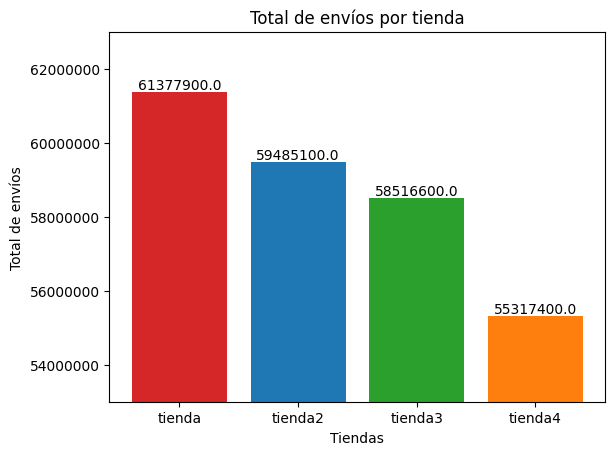

In [ ]:
import matplotlib.pyplot as plt

tiendas = list(total_envios.keys())
envios = list(total_envios.values())
bar_colors = ['tab:red','tab:blue','tab:green','tab:orange']
plt.subplot()
barras = plt.bar(tiendas,envios,color=bar_colors)
plt.ylabel('Total de envíos')
plt.xlabel('Tiendas')
plt.title('Total de envíos por tienda')

plt.bar_label(barras, envios, label_type='edge')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylim(53000000, 63000000)

plt.show()

In [ ]:
def envio(sucursal):
  costos_tienda = list(zip(sucursal['Lugar de Compra'], sucursal['Costo de envío']))
  total_costo = 0
  total_datos = len(costos_tienda)
  costo_envio_total = 0
  for n in range(total_datos):
    costo_envio_total += costos_tienda[n][1]
    if n == 0:
      valor_maximo = costos_tienda[n][1]
      lugar_maximo = costos_tienda[n][0]
    else:
      if costos_tienda[n][1] > valor_maximo:
        valor_maximo = costos_tienda[n][1]
        lugar_maximo = costos_tienda[n][0]
  promedio_envio = float(costo_envio_total)/float(total_datos)
  mensaje_envio = f'El promedio de envío es {round(promedio_envio, 2)}\n'
  mensaje_envio += f'El valor máximo fue de {valor_maximo}, con lugar de compra {lugar_maximo}'
  return mensaje_envio

In [ ]:
# Análisis Tienda 1:
envio_tienda_1 = envio(tienda)
print(envio_tienda_1)

El promedio de envío es 26018.61
El valor máximo fue de 160800.0, con lugar de compra Cali


In [ ]:
# Análisis Tienda 2
envio_tienda_2 = envio(tienda2)
print(envio_tienda_2)

El promedio de envío es 25216.24
El valor máximo fue de 162500.0, con lugar de compra Medellín


In [ ]:
# Análisis Tienda 3:
envio_tienda_3 = envio(tienda3)
print(envio_tienda_3)

El promedio de envío es 24805.68
El valor máximo fue de 158400.0, con lugar de compra Medellín


In [ ]:
# Análisis Tienda 4:
envio_tienda_4 = envio(tienda4)
print(envio_tienda_4)

El promedio de envío es 23459.46
El valor máximo fue de 154700.0, con lugar de compra Bogotá


# 6. Análisis del desempeño Geográfico

In [7]:
import folium
from folium.plugins import HeatMap

In [ ]:
def mapa2(sucursal):
  ubicacion = list(zip(sucursal['lat'],sucursal['lon'],sucursal['Precio']))
  ub_unicas = list(set(list(zip(sucursal['lat'],sucursal['lon']))))
  frecuencia_venta = []
  for n in ub_unicas:
    cuenta = 0
    for lat, lon, costo in ubicacion:
      if n[0] == lat and n[1] == lon:
        cuenta += costo
    frecuencia_venta.append([n[0], n[1], cuenta])
  return frecuencia_venta
# ubicaciones_tienda_z = mapa2(tienda)
# mapaz = folium.Map(location=[4.570868, -74.297333], zoom_start= 6)
# HeatMap(ubicaciones_tienda_z, weights= [valor[2] for valor in ubicaciones_tienda_z], radius= 20, blur= 25).add_to(mapaz)
# mapaz

In [ ]:
ubicaciones_tienda_1 = mapa2(tienda)
mapa1 = folium.Map(location=[4.570868, -74.297333], zoom_start= 6)
mapa2 = folium.Map(location=[4.570868, -74.297333], zoom_start= 6)
for i in range(len(ubicaciones_tienda_1)):
  folium.Marker(location= [ubicaciones_tienda_1[i][0],ubicaciones_tienda_1[i][1]], popup= f"Ventas: {ubicaciones_tienda_1[i][2]}", icon= folium.Icon(color = "blue")).add_to(mapa1)
# HeatMap(ubicacion_frecuencia, weigths = [valor[2] for valor in ubicacion_frecuencia], radius = 20, blur = 25).add_to(z)
HeatMap(ubicaciones_tienda_1, weights= [valor[2] for valor in ubicaciones_tienda_1], radius= 20, blur= 25).add_to(mapa2)
#Análisis de desempeño geográfico tienda 1:
#El siguiente mapa muestra los puntos donde se distribuyeron las ventas de tienda 1:
mapa1

In [ ]:
#Mapa de calor de ventas tienda 1:
mapa2

In [ ]:
ubicaciones_tienda_2 = mapa2(tienda2)
mapa3 = folium.Map(location=[4.570868, -74.297333], zoom_start= 6)
mapa4 = folium.Map(location=[4.570868, -74.297333], zoom_start= 6)
for i in range(len(ubicaciones_tienda_2)):
  folium.Marker(location= [ubicaciones_tienda_2[i][0],ubicaciones_tienda_2[i][1]], popup= f"Ventas: {ubicaciones_tienda_2[i][2]}", icon= folium.Icon(color = "orange")).add_to(mapa3)
HeatMap(ubicaciones_tienda_2, weights= [valor[2] for valor in ubicaciones_tienda_2], radius= 20, blur= 25).add_to(mapa4)
#Análisis de desempeño geográfico tienda 1:
#El siguiente mapa muestra los puntos donde se distribuyeron las ventas de tienda 1:
mapa3

In [ ]:
mapa4

In [ ]:
ubicaciones_tienda_3 = mapa2(tienda3)
mapa5 = folium.Map(location=[4.570868, -74.297333], zoom_start= 6)
mapa6 = folium.Map(location=[4.570868, -74.297333], zoom_start= 6)
for i in range(len(ubicaciones_tienda_3)):
  folium.Marker(location= [ubicaciones_tienda_3[i][0],ubicaciones_tienda_3[i][1]], popup= f"Ventas: {ubicaciones_tienda_3[i][2]}", icon= folium.Icon(color = "green")).add_to(mapa5)
HeatMap(ubicaciones_tienda_3, weights= [valor[2] for valor in ubicaciones_tienda_3], radius= 20, blur= 25).add_to(mapa6)
#Análisis de desempeño geográfico tienda 3:
#El siguiente mapa muestra los puntos donde se distribuyeron las ventas de tienda 3:
mapa5

In [ ]:
mapa6

In [ ]:
ubicaciones_tienda_4 = mapa2(tienda4)
mapa7 = folium.Map(location=[4.570868, -74.297333], zoom_start= 6)
mapa8 = folium.Map(location=[4.570868, -74.297333], zoom_start= 6)
for i in range(len(ubicaciones_tienda_4)):
  folium.Marker(location= [ubicaciones_tienda_4[i][0],ubicaciones_tienda_4[i][1]], popup= f"Ventas: {ubicaciones_tienda_4[i][2]}", icon= folium.Icon(color = "red")).add_to(mapa7)
HeatMap(ubicaciones_tienda_4, weights= [valor[2] for valor in ubicaciones_tienda_4], radius= 20, blur= 25).add_to(mapa8)
#Análisis de desempeño geográfico tienda 4:
#El siguiente mapa muestra los puntos donde se distribuyeron las ventas de tienda 4:
mapa7

In [ ]:
mapa8

In [2]:
def mapa_3(sucursal):
  ubicacion = list(zip(sucursal['lat'],sucursal['lon'],sucursal['Precio']))
  ub_unicas = list(set(list(zip(sucursal['lat'],sucursal['lon']))))
  frecuencia_venta = []
  for n in ub_unicas:
    cuenta = 0
    for lat, lon, costo in ubicacion:
      if n[0] == lat and n[1] == lon:
        cuenta += costo
    frecuencia_venta.append((n[0], n[1], cuenta))
  return frecuencia_venta

In [3]:
resultados_mapa = {
    'tienda': mapa_3(tienda),
    'tienda_2': mapa_3(tienda2),
    'tienda_3': mapa_3(tienda3),
    'tienda_4': mapa_3(tienda4)
}

In [4]:
ubicaciones_unicas =  list(set(list(zip(tienda['lat'],tienda['lon']))))
ubicaciones_unicas

[(1.21361, -77.28111),
 (-4.21528, -69.94056),
 (7.89391, -72.50782),
 (11.24079, -74.19904),
 (10.96854, -74.78132),
 (5.06889, -75.51738),
 (10.46314, -73.25322),
 (3.43722, -76.5225),
 (2.9273, -75.28189),
 (7.12539, -73.1198),
 (11.54444, -72.90722),
 (6.25184, -75.56359),
 (4.60971, -74.08175),
 (3.8653, -67.9239),
 (10.39972, -75.51444),
 (4.57937, -74.21682),
 (4.81333, -75.69611),
 (4.53389, -75.68111),
 (4.142, -73.62664)]

In [5]:
test_ub_max = []

for ubicaciones in ubicaciones_unicas:
  valor_maximo = 0
  for id, lista in resultados_mapa.items():
    for tupla in lista:
      if ubicaciones[0] == tupla[0] and ubicaciones[1] == tupla[1]:
        if tupla[2]> valor_maximo:
          id_maximo = id
          valor_maximo = tupla[2]
  test_ub_max.append((ubicaciones[0],ubicaciones[1],id_maximo))
test_ub_max

[(1.21361, -77.28111, 'tienda'),
 (-4.21528, -69.94056, 'tienda_3'),
 (7.89391, -72.50782, 'tienda'),
 (11.24079, -74.19904, 'tienda_2'),
 (10.96854, -74.78132, 'tienda_3'),
 (5.06889, -75.51738, 'tienda'),
 (10.46314, -73.25322, 'tienda_3'),
 (3.43722, -76.5225, 'tienda'),
 (2.9273, -75.28189, 'tienda_4'),
 (7.12539, -73.1198, 'tienda_4'),
 (11.54444, -72.90722, 'tienda_4'),
 (6.25184, -75.56359, 'tienda_2'),
 (4.60971, -74.08175, 'tienda_2'),
 (3.8653, -67.9239, 'tienda'),
 (10.39972, -75.51444, 'tienda_3'),
 (4.57937, -74.21682, 'tienda'),
 (4.81333, -75.69611, 'tienda_4'),
 (4.53389, -75.68111, 'tienda'),
 (4.142, -73.62664, 'tienda')]

In [8]:
#Mapa para identificar por zonas cuál tienda registra la mayor cantidad de ventas
mapa_test = folium.Map(location=[4.570868, -74.297333], zoom_start= 6)
for i in range(len(test_ub_max)):
  folium.Marker(location= [test_ub_max[i][0],test_ub_max[i][1]], popup= f"{test_ub_max[i][2]}", icon= folium.Icon(color = "red")).add_to(mapa_test)
mapa_test

In [9]:
def mapa_4(sucursal):
  ubicacion = list(zip(sucursal['lat'],sucursal['lon'],sucursal['Costo de envío']))
  ub_unicas = list(set(list(zip(sucursal['lat'],sucursal['lon']))))
  frecuencia_venta = []
  for n in ub_unicas:
    cuenta = []
    for lat, lon, costo in ubicacion:
      if n[0] == lat and n[1] == lon:
        cuenta.append(costo)
    promedio = sum(cuenta)/len(cuenta)
    frecuencia_venta.append((n[0], n[1], round(promedio,2)))
  return frecuencia_venta

In [10]:
envios_tiendas = {
    'tienda': mapa_4(tienda),
    'tienda_2': mapa_4(tienda2),
    'tienda_3': mapa_4(tienda3),
    'tienda_4': mapa_4(tienda4)
}

In [12]:
envio_prom_min = []

for ubicaciones in ubicaciones_unicas:
  valor_minimo = float('inf')
  for ids, listas in envios_tiendas.items():
    for tuplas in listas:
      if ubicaciones[0] == tuplas[0] and ubicaciones[1] == tuplas[1]:
        if tuplas[2] < valor_minimo:
          id_minimo = ids
          valor_minimo = tuplas[2]
  envio_prom_min.append((ubicaciones[0],ubicaciones[1],id_minimo))
envio_prom_min

[(1.21361, -77.28111, 'tienda_3'),
 (-4.21528, -69.94056, 'tienda'),
 (7.89391, -72.50782, 'tienda_4'),
 (11.24079, -74.19904, 'tienda_3'),
 (10.96854, -74.78132, 'tienda_2'),
 (5.06889, -75.51738, 'tienda_4'),
 (10.46314, -73.25322, 'tienda_2'),
 (3.43722, -76.5225, 'tienda_3'),
 (2.9273, -75.28189, 'tienda_3'),
 (7.12539, -73.1198, 'tienda_3'),
 (11.54444, -72.90722, 'tienda_2'),
 (6.25184, -75.56359, 'tienda_3'),
 (4.60971, -74.08175, 'tienda_4'),
 (3.8653, -67.9239, 'tienda_3'),
 (10.39972, -75.51444, 'tienda_2'),
 (4.57937, -74.21682, 'tienda_3'),
 (4.81333, -75.69611, 'tienda_2'),
 (4.53389, -75.68111, 'tienda_4'),
 (4.142, -73.62664, 'tienda_3')]

In [14]:
#Mapa para identificar por zonas cuál tienda registra el costo de envío mínimo
mapa_envio_min = folium.Map(location=[4.570868, -74.297333], zoom_start= 6)
for i in range(len(envio_prom_min)):
  folium.Marker(location= [envio_prom_min[i][0],envio_prom_min[i][1]], popup= f"{envio_prom_min[i][2]}", icon= folium.Icon(color = "black")).add_to(mapa_envio_min)
mapa_envio_min

## Análisis de los resultados obtenidos:

A partir de un análisis realizado mediante Python, se evalúa el desempeño general de las ventas de cuatro tiendas propiedad del señor Juan. Este informe tiene como propósito guiar al cliente en la elección de la tienda más estratégica para vender y, de este modo, financiar sus proyectos.

Para ello, se analizaron de forma exhaustiva los siguientes aspectos: las ventas totales, la gama de productos, la calificación de la experiencia del cliente y la variable geográfica de cada tienda.

Las conclusiones finales evalúan la conveniencia de una posible venta y exploran alternativas viables.

A continuación, se describen los factores analizados a lo largo del proceso:

### 1. Ingresos totales de las tiendas

En este apartado se realiza un análisis considerando la relación entre las ventas efectuadas por cada una de las tiendas, descontando de estas los costos de envío de cada producto. De este modo, se estima la ganancia obtenida por el señor Juan, basada en las bases de datos proporcionadas.

A partir del análisis, se observa que la tienda 4 presenta un menor desempeño en comparación con las otras tres tiendas. En particular, se registra una diferencia de facturación aproximada de $106,444,200 respecto a la tienda con mayores ganancias (tienda 1), lo que representa una diferencia del 2.55% en relación con la ganancia total de las cuatro tiendas.

### 2. Categorías de productos más y menos vendidas

El análisis de las ventas por categoría se realizó considerando dos factores:

- **Los ingresos totales por categoría**, expresados como porcentaje del total, lo cual se refleja en el gráfico _"Porcentaje de facturación de cada categoría en cada tienda"_.

En este gráfico se observa que las tres categorías predominantes en todas las tiendas son:

- Electrodomésticos  
- Electrónicos  
- Muebles

Al considerar únicamente estas tres categorías, los porcentajes de facturación para cada tienda son los siguientes:

- **Tienda 1:** 85.22%  
- **Tienda 2:** 83.82%  
- **Tienda 3:** 85.70%  
- **Tienda 4:** 85.25%

Esto indica que, en términos de ingresos, todas las tiendas presentan un desempeño similar. No obstante, la tienda 2 muestra una leve menor dependencia de estas tres categorías.

- **La cantidad de piezas vendidas por categoría**, lo cual se refleja en el gráfico _"Cantidad de artículos de cada categoría por tienda"_.

A partir de este análisis, se pueden destacar los siguientes puntos:

- **La tienda 4** sobresale en la venta de artículos para el hogar y juguetes, pero registra una menor cantidad de piezas vendidas en la categoría de electrodomésticos, a pesar de tener una proporción de ingresos similar a las otras tiendas en esta categoría. Esto sugiere que, si se decide mantener esta tienda, sería recomendable aumentar el volumen de artículos vendidos en la categoría de electrodomésticos para igualar su desempeño con el de las otras sucursales.

- **La tienda 2** destaca en la venta de instrumentos musicales y libros, lo cual contrasta con su rendimiento en las categorías de electrónicos y muebles. Esta observación refuerza los resultados del análisis de ingresos por categoría y explica por qué el desempeño general de la tienda se mantiene, a pesar de su bajo rendimiento en dos de las categorías más populares.

### 3. Calificaciones promedio de los clientes por tienda

Este análisis se abordó desde dos perspectivas:

- **Calificación promedio por tienda:**  
  Se observa que la tienda 1 presenta la evaluación global más baja, con un promedio de **3.98**, mientras que la tienda 3 obtiene la mejor calificación, con un promedio de **4.05**.

- **Calificaciones por venta (enfoque en atención al cliente):**  
  Dado que la calidad de los productos es uniforme en todas las tiendas, se realizó un análisis de las calificaciones asociadas a cada venta, con el objetivo de obtener métricas de satisfacción relacionadas con la atención brindada por los vendedores.

  En este sentido, se destaca que en la tienda 1, tres de los vendedores presentan evaluaciones por debajo de **3.9**, lo cual impacta negativamente en la calificación global de la tienda. Esto sugiere que una estrategia comercial enfocada en mejorar la atención al cliente podría contribuir significativamente a elevar la percepción general y, en consecuencia, las ganancias.

  Por otro lado, al observar el gráfico correspondiente a la tienda 2, se puede concluir que esta presenta el desempeño más uniforme en su equipo de trabajo, ya que **ningún colaborador obtuvo una calificación menor a 3.9**.


### 4. Productos más y menos vendidos

Se realizó un análisis de los productos más y menos vendidos en cada tienda, observando una estrecha relación con los hallazgos del análisis presentado en el punto 2.

En general, se observa que en el **top 10 de artículos más vendidos** de las tiendas 1 y 3 predominan productos pertenecientes a las categorías de **Muebles**, **Electrónicos** y **Electrodomésticos**, lo cual contribuye a su mayor volumen de facturación y ganancias.

En el caso de la **tienda 2**, dentro de los cinco artículos más vendidos destacan las categorías de **Instrumentos musicales** y **Libros**, mientras que los productos menos vendidos corresponden principalmente a las categorías más populares en las tiendas 1 y 3. La hipótesis es que las ganancias de la tienda 3 podrían explicarse por la comercialización de productos de mayor valor unitario, además de una **mayor diversidad en las categorías de artículos vendidos**.

Por su parte, en la **tienda 4** se observa que la categoría de **Electrodomésticos** no figura entre los diez productos más vendidos, lo cual coincide con lo señalado en el análisis por categoría. Este hallazgo refuerza la idea de que esta es clave para lograr una rentabilidad similar a la de las otras tiendas.

### 5. Costo de envío promedio por tienda

Se realizó un análisis del costo promedio de envío en todas las tiendas.

En primer lugar, se observó que la **tienda 1** reporta el mayor costo total de envíos. Esto da lugar a dos posibles hipótesis:

1. Que el elevado costo esté relacionado con el **alto volumen de ventas** de esta tienda.
2. Que los artículos más vendidos, pertenecientes a las categorías de **Electrónicos**, **Muebles** y **Electrodomésticos**, generen mayores costos de envío debido a sus **dimensiones y peso**.

Por otro lado, al analizar los **costos de envío promedio**, se destaca que la **tienda 4** presenta el valor más bajo. Este resultado podría deberse a dos factores:

- Una **menor cantidad de ventas** en la categoría de electrodomésticos (como se evidenció en análisis anteriores).
- Una **ubicación geográfica más favorable**, que permita reducir los costos logísticos en comparación con las demás sucursales.

Se recomienda profundizar en este análisis teniendo en cuenta las ubicaciones de las tiendas para confirmar cuál de estas variables influye de forma más significativa en la diferencia de costos.

### 6. Análisis de desempeño geográfico

A partir del análisis geográfico de las ventas, se identificaron los siguientes patrones:

- **Bogotá** y **Pereira** fueron las ciudades con el mayor volumen de ventas en general.  
- **Medellín** se destacó por concentrar la mayor cantidad de ventas específicamente en las tiendas 1 y 2.  
- La **región norte de Colombia**, integrada por ciudades como **Cartagena de Indias**, **Barranquilla**, **Santa Marta**, **Valledupar** y **Riohacha**, presentó un volumen considerable de compras. Esta zona puede considerarse como un **foco estratégico de actividad comercial**.  
- También se registraron ventas en ciudades como **Bucaramanga**, **Cúcuta**, **Inírida**, **Cali** y **Neiva**; sin embargo, el volumen fue menor en comparación con las principales ciudades del país.
- Adicional, se hizo una comparación de la tienda que generó mayor ganancias por cada una de las distribuciones de las ventas en toda Colombia. En esta observamos que la tienda 1 predomina en 7 de las ciudades, entre ellas 2 de las tiendas con mayor concentración de ventas en la zona Manizales, Armenia y Pereira. Sin embargo, en la zona de Bogotá y en el norte de Colombia predominan las otras 3 tiendas.
- Se hizo una última evaluación del costo de envío promedio en cada una de las zonas geográficas donde se reportan ventas, lo cual da como resultado que la tienda 1 solo registre costos menores de envío en las ventas de la ciudad de Leticia, en tanto que el Bogotá la tienda 4 reporta menor costos de envío en las dos zonas identificadas con mayor cantidad de ventas (Manizales-Armenia-Pereira y Bogotá). Por último, la tienda 3 es la que reporta un menor costo en 9 de las zonas identificadas de distribución.
Estos resultados permiten identificar las zonas geográficas con mayor potencial de crecimiento o consolidación comercial para futuras decisiones estratégicas.

### Conclusión

Con base en el análisis integral realizado, se presentan las siguientes conclusiones:

- Las **tiendas 2 y 3** muestran un desempeño sólido y consistente, con un alto nivel de ventas, buenas calificaciones por parte de los clientes, diversidad en las categorías de productos vendidos y costos de envío razonables. Por tanto, **se recomienda mantener su operación** como parte de la estrategia comercial del Señor Juan.

- En el caso de la **tienda 1**, aunque presenta el mayor volumen de ventas y ganancias totales, también registra las **calificaciones promedio más bajas** y **los costos de envío más altos**. Esto podría deberse a que fue la primera tienda establecida o a que maneja un volumen logístico más complejo. Sin embargo, estos factores afectan la percepción del cliente y la rentabilidad. **Se sugiere realizar un diagnóstico profundo** para identificar la causa raíz del bajo nivel de satisfacción y los altos costos, y aplicar ajustes tanto en la atención al cliente como en la estrategia logística, considerando los hallazgos del análisis geográfico.

- La **tienda 4** muestra el menor nivel de ganancias, principalmente por una **baja participación de la categoría de electrodomésticos**. A pesar de ello, mantiene un desempeño comparable al de las tiendas 2 y 3 en cuanto a calificaciones y costos de envío, destacándose incluso por tener el **menor costo promedio** . Esto podría indicar una **ventaja geográfica estratégica**. Se recomienda explorar **estrategias de marketing enfocadas en impulsar la venta de electrodomésticos** antes de considerar cualquier decisión drástica.

En resumen, se considera que **las calificaciones del cliente y los costos logísticos** son factores clave que pueden impactar a largo plazo el desempeño general de todas las tiendas. Por ello, **se sugiere al Señor Juan considerar la posibilidad de prescindir de la tienda 1**, siempre y cuando no se implementen medidas correctivas que reviertan las tendencias negativas observadas.

